In [14]:
from tensorflow.keras import models, optimizers, callbacks, Sequential
#import tensorflow_addons as tfa
import numpy as np
import time
from network_functions import *
from sklearn.model_selection import train_test_split
from data_generation_functions import generate_final_data

import matplotlib.pyplot as plt 
import matplotlib
matplotlib.rcParams['figure.dpi']=50

In [15]:
#== import the data
data_1 = np.load("data/1OverF_1.npz")
data_2 = np.load("data/Lor_1.npz")
data_3 = np.load("data/1OverF-Lorf_1.npz")
c_data = np.append( data_1['arr_0'], np.append( data_2['arr_0'], data_3['arr_0'], axis=0 ), axis=0 )
T_in = data_1['arr_1']         # Time vector for data generation 
s_data = np.append( data_1['arr_2'], np.append( data_2['arr_2'], data_3['arr_2'], axis=0 ), axis=0 )
w0 = data_1['arr_3']           # Omega vector for data generation
T_train = data_1['arr_4']      # Time vector for training data (based on the experimental data)
w_train = data_1['arr_5']      # Omega vector for training data
T2_span = data_1['arr_6']      # T2 distribution
print('-- data loaded')

#== format the data for the training stage
c_train, s_train = \
generate_final_data(c_data,T_in,s_data,w0,T_train,w_train,T2_span)

x_train, x_test, y_train, y_test = train_test_split( c_train, s_train, test_size=0.15 )

print('-- data split for training:')
print("  x_train = ",np.shape(x_train))
print("  y_train = ",np.shape(y_train))
print("  x_test = ",np.shape(x_test))
print("  y_test = ",np.shape(y_test))
print("  w0 = ",np.shape(w0))
print("  w_train = ",np.shape(w_train))

-- data loaded
-- data split for training:
  x_train =  (85812, 147)
  y_train =  (85812, 501)
  x_test =  (15144, 147)
  y_test =  (15144, 501)
  w0 =  (4001,)
  w_train =  (501,)


In [16]:
paramchar = "8.25_fil=40_ker=20_dr0.05_ps=2_LRini=0.001_LRmin=1e-06_bs=64_ep=250_NOISE_TYPES=3"
model = models.load_model('RESULTS/MODEL_'+paramchar)
final_accuracy = 8.25

In [17]:
predictions = model.predict(x_test)

474/474 [==============================] - 3s 6ms/step


In [18]:
rand_set = np.random.randint( 0, y_test.shape[0] ,(4,) )

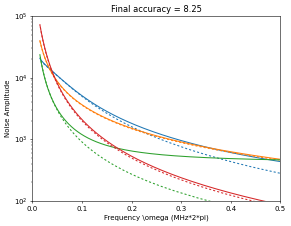

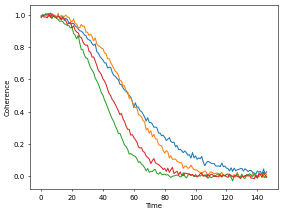

In [20]:
for i in range(len(rand_set)):
    plt.plot(w_train/1e6, y_test[ rand_set[i] ,:],color='C'+str(i))
    plt.plot(w_train/1e6, predictions[ rand_set[i] ],dashes=[2,2,2,2],color='C'+str(i))
plt.yscale('log')
plt.ylim(1e2,1e5)
plt.xlim(0, 0.5e6/1e6)
plt.ylabel('Noise Amplitude')
plt.xlabel('Frequency \omega (MHz*2*pi)')
plt.title('Final accuracy = '+str(final_accuracy))
plt.show()

for i in range(len(rand_set)):
    plt.plot(x_train[ rand_set[i] ,:],color='C'+str(i))
plt.ylabel('Coherence')
plt.xlabel('Time')
plt.show()

In [4]:
FILTER_NB=40
KERNEL_SIZE=20
DROPOUT_RATE=0.05
POOL_SIZE=2
X_TRAIN_SIZE = np.shape(x_train)[-1]

model2 = get_model( filter_nb=FILTER_NB, kernel_size=KERNEL_SIZE, pool_size=POOL_SIZE,\
                  dropout_rate=DROPOUT_RATE, xtrain_size=X_TRAIN_SIZE )

model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 147, 40)           840       
                                                                 
 conv1d_1 (Conv1D)           (None, 147, 40)           32040     
                                                                 
 max_pooling1d (MaxPooling1  (None, 74, 40)            0         
 D)                                                              
                                                                 
 conv1d_2 (Conv1D)           (None, 74, 20)            16020     
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 37, 20)            0         
 g1D)                                                            
                                                                 
 conv1d_3 (Conv1D)           (None, 37, 10)            4

In [5]:
predictions2 = model2.predict(x_test)

474/474 [==============================] - 3s 6ms/step


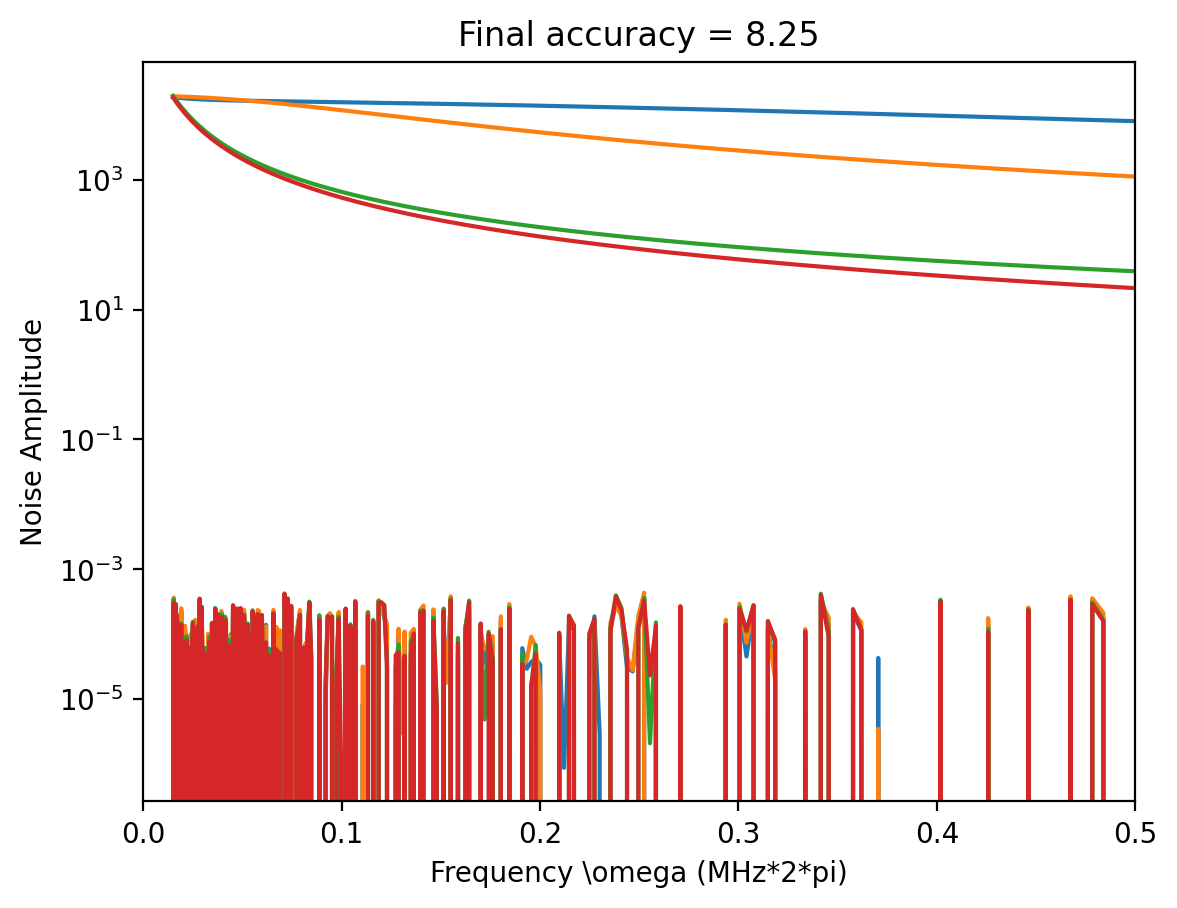

In [26]:
for i in range(len(rand_set)):
    plt.plot(w_train/1e6, y_test[ rand_set[i] ,:],color='C'+str(i))
    plt.plot(w_train/1e6, predictions2[ rand_set[i] ],color='C'+str(i))
plt.yscale('log')
plt.xlim(0, 0.5e6/1e6)

plt.ylabel('Noise Amplitude')
plt.xlabel('Frequency \omega (MHz*2*pi)')
plt.title('Final accuracy = '+str(final_accuracy))
plt.show()